In [1]:
# loading temperature of three years
import pandas as pd

df = pd.read_csv('datasets/weather/temperature.csv')

In [2]:
df.set_index('datetime',inplace=True)

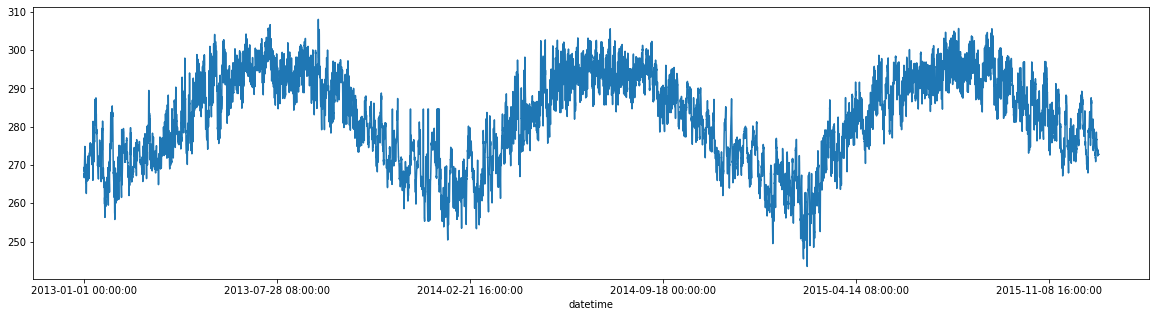

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df["Detroit"]['2013-01-01 00:00:00':'2015-12-31 23:00:00'].plot(figsize=(20,5))
plt.show()

In [4]:
selected_columns = df[["Detroit"]]
new_df=selected_columns.copy()
new_df.head()

,Detroit
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,284.030000
2012-10-01 14:00:00,284.069789
2012-10-01 15:00:00,284.173965
2012-10-01 16:00:00,284.278140


In [5]:
# covert Kelvin to Fahrenheit
#T(°F) = T(K) × 9/5 - 459.67
new_df['Detroit'] = new_df['Detroit'] * 9 / 5 - 459.67
new_df.head()

,Detroit
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,51.584000
2012-10-01 14:00:00,51.655621
2012-10-01 15:00:00,51.843136
2012-10-01 16:00:00,52.030652


In [6]:
# we remove temperature of days in summer season

input_data1 = new_df.loc['2013-01-01 00:00:00':'2013-05-15 23:00:00',:]
input_data2 = new_df.loc['2013-09-15 00:00:00':'2013-12-31 23:00:00',:]
input_data3 = new_df.loc['2014-01-01 00:00:00':'2014-05-15 23:00:00',:]
input_data4 = new_df.loc['2014-09-15 00:00:00':'2014-12-31 23:00:00',:]
input_data5 = new_df.loc['2015-01-01 00:00:00':'2015-05-15 23:00:00',:]
input_data6 = new_df.loc['2015-09-15 00:00:00':'2015-12-31 23:00:00',:]
input_data = pd.concat([input_data1, input_data2, input_data3, input_data4, input_data5, input_data6])

In [7]:
training_data = input_data.values
training_data.shape

(17496, 1)

In [8]:
# load day-ahead prices of three years
import pandas as pd
df1 = pd.read_csv('datasets/DAP/2017/jan_feb.csv')
df2 = pd.read_csv('datasets/DAP/2017/mar_apr.csv')
df3 = pd.read_csv('datasets/DAP/2017/may_jun.csv')
df4 = pd.read_csv('datasets/DAP/2017/july_august.csv')
df5 = pd.read_csv('datasets/DAP/2017/sep_oct.csv')
df6 = pd.read_csv('datasets/DAP/2017/nov_dec.csv')

df7 = pd.read_csv('datasets/DAP/2018/jan_feb.csv')
df8 = pd.read_csv('datasets/DAP/2018/mar_apr.csv')
df9 = pd.read_csv('datasets/DAP/2018/may_jun.csv')
df10 = pd.read_csv('datasets/DAP/2018/july_august.csv')
df11 = pd.read_csv('datasets/DAP/2018/sep_oct.csv')
df12 = pd.read_csv('datasets/DAP/2018/nov_dec.csv')

df13 = pd.read_csv('datasets/DAP/2019/jan_feb.csv')
df14 = pd.read_csv('datasets/DAP/2019/mar_apr.csv')
df15 = pd.read_csv('datasets/DAP/2019/may_jun.csv')
df16 = pd.read_csv('datasets/DAP/2019/july_august.csv')
df17 = pd.read_csv('datasets/DAP/2019/sep_oct.csv')
df18 = pd.read_csv('datasets/DAP/2019/nov_dec.csv')

frames =[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18]
three_year_price_data_frame = pd.concat(frames)

In [9]:
three_year_price_data_frame.set_index("DateTime", inplace=True)
three_year_price_data_frame.info

<bound method DataFrame.info of                      day_ahead_pricing (michigan_hub) (miso)
DateTime                                                    
2017-01-01 00:00:00                                    24.36
2017-01-01 01:00:00                                    23.27
2017-01-01 02:00:00                                    22.57
2017-01-01 03:00:00                                    22.89
2017-01-01 04:00:00                                    22.38
...                                                      ...
2019-12-31 19:00:00                                    27.63
2019-12-31 20:00:00                                    26.66
2019-12-31 21:00:00                                    24.50
2019-12-31 22:00:00                                    21.76
2019-12-31 23:00:00                                    20.75

[26280 rows x 1 columns]>

In [10]:
# convert to cent/kwh
three_year_price_data_frame["day_ahead_pricing (michigan_hub) (miso)"] = three_year_price_data_frame["day_ahead_pricing (michigan_hub) (miso)"] / 10

In [11]:
three_year_price_data_frame.info

<bound method DataFrame.info of                      day_ahead_pricing (michigan_hub) (miso)
DateTime                                                    
2017-01-01 00:00:00                                    2.436
2017-01-01 01:00:00                                    2.327
2017-01-01 02:00:00                                    2.257
2017-01-01 03:00:00                                    2.289
2017-01-01 04:00:00                                    2.238
...                                                      ...
2019-12-31 19:00:00                                    2.763
2019-12-31 20:00:00                                    2.666
2019-12-31 21:00:00                                    2.450
2019-12-31 22:00:00                                    2.176
2019-12-31 23:00:00                                    2.075

[26280 rows x 1 columns]>

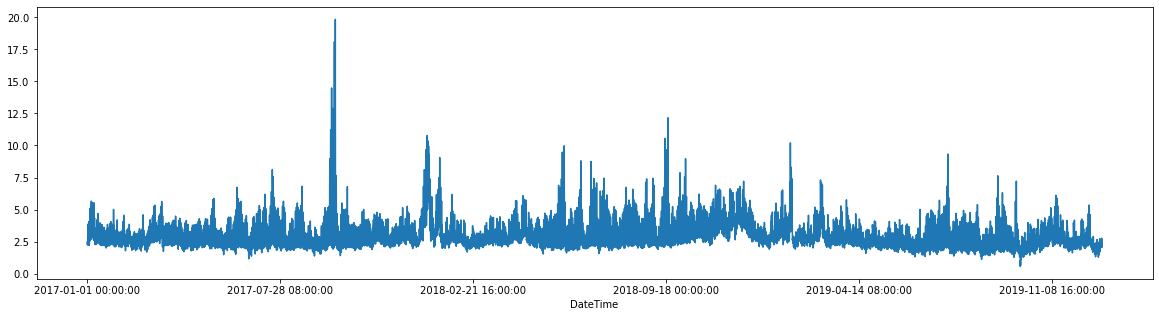

In [12]:
three_year_price_data_frame["day_ahead_pricing (michigan_hub) (miso)"].plot(figsize=(20,5))
plt.show()

In [13]:
# removing the prices of days in summer season

price_data1 = three_year_price_data_frame.loc['2017-01-01 00:00:00':'2017-05-15 23:00:00',:]
price_data2 = three_year_price_data_frame.loc['2017-09-15 00:00:00':'2017-12-31 23:00:00',:]
price_data3 = three_year_price_data_frame.loc['2018-01-01 00:00:00':'2018-05-15 23:00:00',:]
price_data4 = three_year_price_data_frame.loc['2018-09-15 00:00:00':'2018-12-31 23:00:00',:]
price_data5 = three_year_price_data_frame.loc['2019-01-01 00:00:00':'2019-05-15 23:00:00',:]
price_data6 = three_year_price_data_frame.loc['2019-09-15 00:00:00':'2019-12-31 23:00:00',:]
price_data = pd.concat([price_data1, price_data2, price_data3, price_data4, price_data5, price_data6])

In [14]:
three_year_price = price_data.values
three_year_price.shape

(17496, 1)

In [15]:
import numpy as np
from mip import Model, xsum, BINARY

def action_by_mip(T_out, price):

    number_time_slot = 24

    m = Model()

    # definition of variables of HVAC system -----------------------------------
    T_min = 66.2 # 19 C
    T_max = 75.2 # 24 C
    T = [m.add_var() for i in range(number_time_slot + 1)]
    y = [m.add_var(var_type=BINARY) for i in range(number_time_slot+1)]
    T[0] = T_out[0]
    x1 =[m.add_var() for i in range(number_time_slot + 1)]
    x1[0]=0
    x2 =[m.add_var() for i in range(number_time_slot + 1)]
    x2[0]=0
    x3 =[m.add_var() for i in range(number_time_slot + 1)]
    x3[0]=0
    w1 =[m.add_var(var_type=BINARY) for i in range(number_time_slot + 1)]
    w1[0]=0
    w2 =[m.add_var(var_type=BINARY) for i in range(number_time_slot + 1)]
    w2[0]=0
    w3 =[m.add_var(var_type=BINARY) for i in range(number_time_slot + 1)]
    w3[0]=0
    HVAC_energy = [m.add_var(lb=0, ub=15) for i in range(number_time_slot)]
    weight_coefficient = 4

    # definition of objective function --------------------------------------------------------------------------------
    m.objective = xsum(HVAC_energy[i] * price[i] + weight_coefficient * (T_min * w1[i+1] - x1[i+1] + x3[i+1] - T_max * w3[i+1]) for i in range(number_time_slot))
    
    for i in range(number_time_slot):
        m += T[i+1] == 0.7 * T[i] + (1 - 0.7) * (T_out[i] + (2.5 / 0.14) * HVAC_energy[i])

    for i in range(number_time_slot+1):
        m += T_max <= T[i] - 0.001 + 1000 * (1-y[i])
        m += T_max >= T[i] - 1000 * y[i]

    for i in range(number_time_slot):
        m += HVAC_energy[i] <= 0 + 1000 * (1 - y[i])
        m += HVAC_energy[i] >= 0 - 1000 * (1 - y[i])
        
    for i in range(number_time_slot):
        m += 1 == w1[i+1] + w2[i+1] + w3[i+1]
        m += T[i+1] == x1[i+1] + x2[i+1] + x3[i+1]

    for i in range(number_time_slot):
        m += x1[i+1] <= T_min * w1[i+1]
        m += x1[i+1] >= -1000 * w1[i+1]

    for i in range(number_time_slot):
        m += x2[i+1] <= T_max * w2[i+1]
        m += x2[i+1] >= T_min * w2[i+1]

    for i in range(number_time_slot):
        m += x3[i+1] <= 1000 * w3[i+1]
        m += x3[i+1] >= T_max * w3[i+1]

    
    m.optimize()
    #print("the minimum value --------------------------------------------------------------------------")
    #print("optimal value =", m.objective_value)
    #print("temperature----------------------------------")
    T_in = []
    for i in range(number_time_slot):
        #print(i+1,"=",T[i+1].x)
        T_in.append(T[i+1].x)
    #print("HVAC energy ----------------------------------")
    HVAC = []
    for i in range(number_time_slot):
    #    print(i,"=", HVAC_energy[i].x)
        HVAC.append(HVAC_energy[i].x)
    
    return np.array(HVAC), np.array(T_in), m.objective_value

In [16]:
# calculating the optimal hourly power consumption and optimal temperature of each day in training dataset by using MILP solver
best_HVAC_energy=[]
best_temperature = []
best_obj_value = []


for i in range(0,training_data.shape[0],24):
    tempt1, tempt2, tempt3 = action_by_mip(training_data[i: i + 24].ravel(), three_year_price[i: i + 24].ravel())
    best_HVAC_energy.append(tempt1)
    best_temperature.append(tempt2)
    best_obj_value.append(tempt3)

best_energy = np.array(best_HVAC_energy)
np.savetxt("datasets/best_energy.csv", best_energy, delimiter=";")
best_temperature = np.array(best_temperature)
np.savetxt("datasets/best_temperature.csv", best_temperature, delimiter=";")
best_obj_value = np.array(best_obj_value)
np.savetxt("datasets/best_cost.csv", best_obj_value, delimiter=";")


#best_energy = np.loadtxt("datasets/best_energy.csv",delimiter=";")
#best_temperature = np.loadtxt("datasets/best_temperature.csv",delimiter=";")
#best_obj_value = np.loadtxt("datasets/best_cost.csv",delimiter=";")
best_energy.shape

(729, 24)

In [17]:
# this functions creates the inputs from optimal results of MILP solver for training DNN
def create_data(T_out, T_in, price):
    data = []
    for d in range(0,T_out.shape[0],24):
        for h in range(24):
            data.append(T_out[d+h])
            if h == 0: 
                data.append(T_out[d+h])
            else:
                data.append(T_in[d+h-1])
            data.append(price[d+h])
            data.append(h)
    return np.array(data).reshape(-1,4)
X_train = create_data(training_data.ravel(), best_temperature.ravel(), three_year_price.ravel())
X_train.shape

(17496, 4)

In [18]:
# a validation set is extracted from training set
x_train,x_valid = X_train[:15288],X_train[15288:]
tempt = best_energy.ravel()
y_train,y_valid = tempt[:15288], tempt[15288:]

In [19]:
import tensorflow as tf
from tensorflow import keras

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model = keras.models.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=[4], kernel_initializer="he_normal"),
    keras.layers.Dense(60, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(60, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


Train on 15288 samples, validate on 2208 samples
Epoch 1/800
15288/15288 - 1s - loss: 8.1202 - val_loss: 1.7789
Epoch 2/800
15288/15288 - 1s - loss: 1.9295 - val_loss: 1.1788
Epoch 3/800
15288/15288 - 1s - loss: 1.0296 - val_loss: 0.9523
Epoch 4/800
15288/15288 - 1s - loss: 1.1508 - val_loss: 0.3241
Epoch 5/800
15288/15288 - 1s - loss: 0.8431 - val_loss: 0.4229
Epoch 6/800
15288/15288 - 1s - loss: 0.6077 - val_loss: 0.4745
Epoch 7/800
15288/15288 - 1s - loss: 0.5061 - val_loss: 0.2844
Epoch 8/800
15288/15288 - 1s - loss: 0.4502 - val_loss: 0.1875
Epoch 9/800
15288/15288 - 1s - loss: 0.3392 - val_loss: 0.2762
Epoch 10/800
15288/15288 - 1s - loss: 0.3484 - val_loss: 0.1864
Epoch 11/800
15288/15288 - 1s - loss: 0.2874 - val_loss: 0.3049
Epoch 12/800
15288/15288 - 1s - loss: 0.3251 - val_loss: 0.2034
Epoch 13/800
15288/15288 - 1s - loss: 0.2626 - val_loss: 0.1863
Epoch 14/800
15288/15288 - 1s - loss: 0.1621 - val_loss: 0.1721
Epoch 15/800
15288/15288 - 1s - loss: 0.1949 - val_loss: 0.1593


Epoch 128/800
15288/15288 - 1s - loss: 0.0142 - val_loss: 0.0371
Epoch 129/800
15288/15288 - 1s - loss: 0.0129 - val_loss: 0.0327
Epoch 130/800
15288/15288 - 1s - loss: 0.0125 - val_loss: 0.0317
Epoch 131/800
15288/15288 - 1s - loss: 0.0138 - val_loss: 0.0559
Epoch 132/800
15288/15288 - 1s - loss: 0.0150 - val_loss: 0.0327
Epoch 133/800
15288/15288 - 1s - loss: 0.0138 - val_loss: 0.0260
Epoch 134/800
15288/15288 - 1s - loss: 0.0121 - val_loss: 0.0363
Epoch 135/800
15288/15288 - 1s - loss: 0.0124 - val_loss: 0.0634
Epoch 136/800
15288/15288 - 1s - loss: 0.0129 - val_loss: 0.0581
Epoch 137/800
15288/15288 - 1s - loss: 0.0130 - val_loss: 0.0761
Epoch 138/800
15288/15288 - 1s - loss: 0.0126 - val_loss: 0.0259
Epoch 139/800
15288/15288 - 0s - loss: 0.0117 - val_loss: 0.0263
Epoch 140/800
15288/15288 - 1s - loss: 0.0127 - val_loss: 0.0213
Epoch 141/800
15288/15288 - 1s - loss: 0.0121 - val_loss: 0.0347
Epoch 142/800
15288/15288 - 1s - loss: 0.0125 - val_loss: 0.0231
Epoch 143/800
15288/15288

15288/15288 - 1s - loss: 0.0108 - val_loss: 0.0229
Epoch 255/800
15288/15288 - 1s - loss: 0.0103 - val_loss: 0.0205
Epoch 256/800
15288/15288 - 1s - loss: 0.0103 - val_loss: 0.0275
Epoch 257/800
15288/15288 - 1s - loss: 0.0106 - val_loss: 0.0194
Epoch 258/800
15288/15288 - 1s - loss: 0.0103 - val_loss: 0.0196
Epoch 259/800
15288/15288 - 1s - loss: 0.0103 - val_loss: 0.0312
Epoch 260/800
15288/15288 - 1s - loss: 0.0104 - val_loss: 0.0234
Epoch 261/800
15288/15288 - 1s - loss: 0.0107 - val_loss: 0.0219
Epoch 262/800
15288/15288 - 1s - loss: 0.0104 - val_loss: 0.0188
Epoch 263/800
15288/15288 - 1s - loss: 0.0101 - val_loss: 0.0172
Epoch 264/800
15288/15288 - 1s - loss: 0.0105 - val_loss: 0.0170
Epoch 265/800
15288/15288 - 1s - loss: 0.0102 - val_loss: 0.0226
Epoch 266/800
15288/15288 - 1s - loss: 0.0101 - val_loss: 0.0178
Epoch 267/800
15288/15288 - 1s - loss: 0.0104 - val_loss: 0.0192
Epoch 268/800
15288/15288 - 1s - loss: 0.0106 - val_loss: 0.0187
Epoch 269/800
15288/15288 - 1s - loss: 

Epoch 381/800
15288/15288 - 1s - loss: 0.0090 - val_loss: 0.0151
Epoch 382/800
15288/15288 - 1s - loss: 0.0093 - val_loss: 0.0147
Epoch 383/800
15288/15288 - 1s - loss: 0.0092 - val_loss: 0.0144
Epoch 384/800
15288/15288 - 1s - loss: 0.0089 - val_loss: 0.0145
Epoch 385/800
15288/15288 - 1s - loss: 0.0093 - val_loss: 0.0144
Epoch 386/800
15288/15288 - 1s - loss: 0.0093 - val_loss: 0.0149
Epoch 387/800
15288/15288 - 1s - loss: 0.0091 - val_loss: 0.0152
Epoch 388/800
15288/15288 - 1s - loss: 0.0091 - val_loss: 0.0149
Epoch 389/800
15288/15288 - 1s - loss: 0.0091 - val_loss: 0.0147
Epoch 390/800
15288/15288 - 1s - loss: 0.0089 - val_loss: 0.0144
Epoch 391/800
15288/15288 - 1s - loss: 0.0093 - val_loss: 0.0146
Epoch 392/800
15288/15288 - 1s - loss: 0.0093 - val_loss: 0.0145
Epoch 393/800
15288/15288 - 1s - loss: 0.0090 - val_loss: 0.0150
Epoch 394/800
15288/15288 - 1s - loss: 0.0092 - val_loss: 0.0150
Epoch 395/800
15288/15288 - 1s - loss: 0.0091 - val_loss: 0.0145
Epoch 396/800
15288/15288

15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0139
Epoch 508/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0138
Epoch 509/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0138
Epoch 510/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0138
Epoch 511/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0139
Epoch 512/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0138
Epoch 513/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0138
Epoch 514/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0138
Epoch 515/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0140
Epoch 516/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0139
Epoch 517/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0139
Epoch 518/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0140
Epoch 519/800
15288/15288 - 1s - loss: 0.0084 - val_loss: 0.0141
Epoch 520/800
15288/15288 - 1s - loss: 0.0085 - val_loss: 0.0140
Epoch 521/800
15288/15288 - 1s - loss: 0.0083 - val_loss: 0.0139
Epoch 522/800
15288/15288 - 1s - loss: 

Epoch 634/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0141
Epoch 635/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0142
Epoch 636/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0140
Epoch 637/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0142
Epoch 638/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0141
Epoch 639/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0140
Epoch 640/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0139
Epoch 641/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0140
Epoch 642/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0139
Epoch 643/800
15288/15288 - 1s - loss: 0.0075 - val_loss: 0.0139
Epoch 644/800
15288/15288 - 1s - loss: 0.0076 - val_loss: 0.0138
Epoch 645/800
15288/15288 - 1s - loss: 0.0075 - val_loss: 0.0138
Epoch 646/800
15288/15288 - 1s - loss: 0.0075 - val_loss: 0.0137
Epoch 647/800
15288/15288 - 1s - loss: 0.0075 - val_loss: 0.0137
Epoch 648/800
15288/15288 - 1s - loss: 0.0075 - val_loss: 0.0138
Epoch 649/800
15288/15288

15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 761/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 762/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 763/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 764/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 765/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 766/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 767/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 768/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 769/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 770/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 771/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 772/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 773/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 774/800
15288/15288 - 1s - loss: 0.0071 - val_loss: 0.0132
Epoch 775/800
15288/15288 - 1s - loss: 

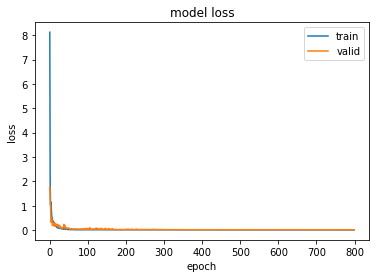

In [20]:
best_model = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

def scheduler(epoch, lr):
    if epoch < 500:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
reduce_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

history1 = model.fit(x_train, y_train, epochs=800, batch_size=24, verbose=2, shuffle=False, validation_data=(x_valid, y_valid), callbacks=[best_model,reduce_schedule])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

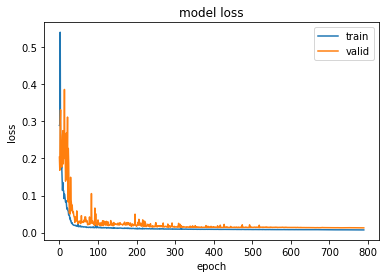

In [23]:
# summarize history for loss
plt.plot(history1.history['loss'][10:])
plt.plot(history1.history['val_loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.savefig("convergence.png", format='png',dpi=600)
plt.show()